 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns= Path('whale_returns.csv')
whale_returns = pd.read_csv('whale_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index(axis=0, inplace= True , ascending = True )
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns= Path('algo_returns.csv')
algo_returns = pd.read_csv('algo_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index(axis=0, inplace= True , ascending = True )
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = pd.read_csv("sp_tsx_history.csv")
sp_tsx.sort_index()

sp_tsx = pd.read_csv('sp_tsx_history.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_tsx.sort_index(axis=0, inplace= True , ascending = True )
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx.dtypes
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Fix Data Types: to do this the Close data type need to change from object to float

In [12]:
##First we need to delete the $ symbol and the commas from the 

sp_tsx ['Close'] = sp_tsx['Close'].str.replace(',', '', regex = True) 
sp_tsx ['Close'] = sp_tsx['Close'].str.replace('$', '', regex = True)
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
##Second we need to change the data type to float to be able to do calculations

sp_tsx['Close'] = sp_tsx['Close'].astype(float)

##Checking the data type was changed
sp_tsx.dtypes

Close    float64
dtype: object

In [14]:
## Calculating the daily returns
daily_returns = (sp_tsx - sp_tsx.shift(1)) / sp_tsx.shift(1)
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
daily_returns = daily_returns.dropna()
daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [ ]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={
    'Close':'SPTSX60'
})

daily_returns.head()

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

returns = pd.concat(
    [algo_returns,whale_returns,daily_returns],
    axis= "columns",
    join="inner"
)
returns

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.


## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios

returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(30,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk
algo_returns.plot.box()

In [ ]:
whale_returns.plot.box()


In [ ]:
daily_returns.plot.box()


In [ ]:
returns.plot.box(figsize=(30,15))

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios

returns_std_daily = returns.std()

returns_std_daily



### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

sptsx60_std_daily = daily_returns.std()
sptsx60_std_daily.head()

In [ ]:
# Determine which portfolios are riskier than the S&P TSX 60

returns_std_daily > returns['SPTSX60'].std()

In [ ]:
# all portfolios except Paulson and Co are riskier than SPTSX60

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)

annualized_returns_std = returns_std_daily * np.sqrt(252)
annualized_returns_std


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_rolling_std = returns.rolling(window=21).std()

# Plot the rolling standard deviation

returns_rolling_std.plot(figsize=(30,10))

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

correlation_returns = returns.corr()

correlation_returns

# Display the correlation matrix

import seaborn as sns

sns.heatmap(correlation_returns, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio : going with Algo 1

covariance_algo1 = returns['Algo 1'].rolling(window=60).cov(returns['SPTSX60'])

# Calculate variance of S&P TSX

variance_sptsx = returns['SPTSX60'].rolling(60).var()

# Computing beta

sptsx_beta = covariance_algo1 / variance_sptsx

# Plot beta trend

sptsx_beta.plot(figsize=(30,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

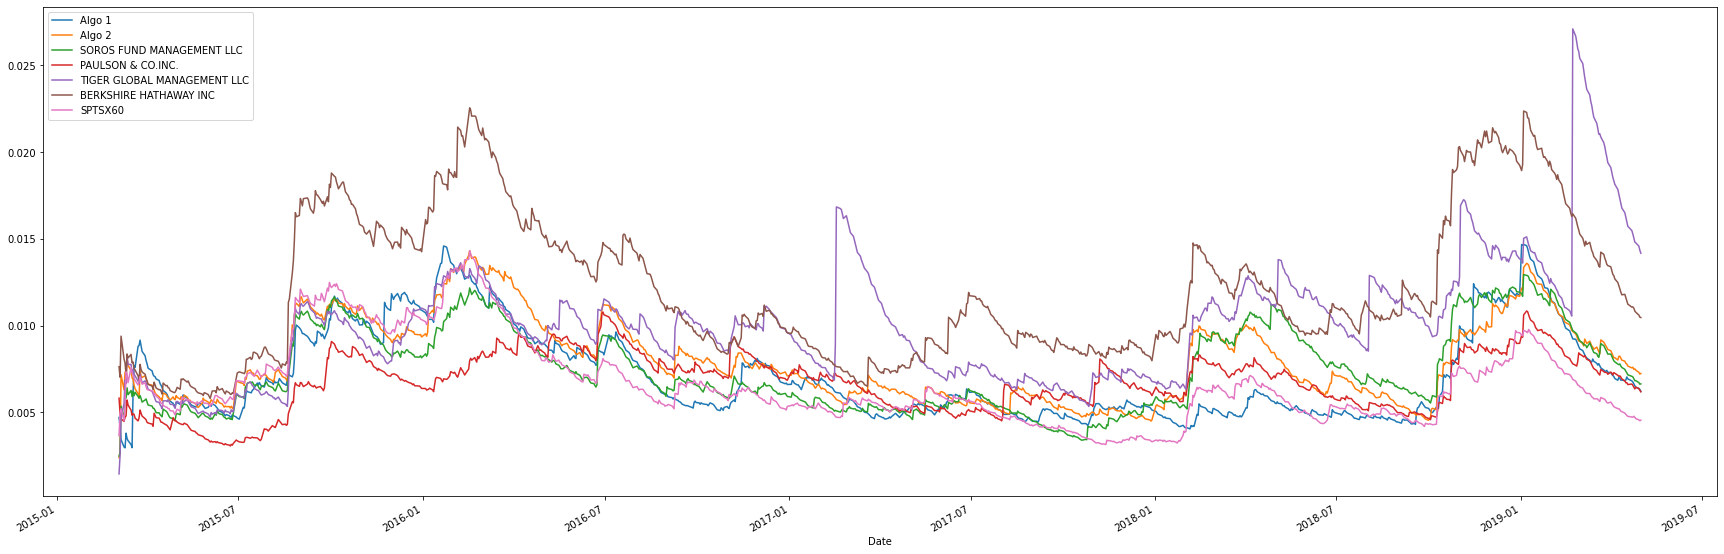

In [32]:
# Use `ewm` to calculate the rolling window

returns.ewm(halflife=21).std().plot(figsize=(30,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
SPTSX60                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

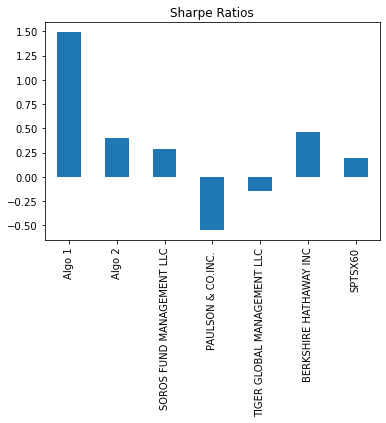

In [34]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algorithmic strategies 1 outperform s&P TSX 60 and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

I worked on a portfolio comprised 

* `F` - [Ford Motor Company](https://en.wikipedia.org/wiki/Ford_Motor_Company)

* `XOM` - [Exxon Mobil Corporation](https://en.wikipedia.org/wiki/Exxon)

* `PFE` - [Pfizer Inc.](https://en.wikipedia.org/wiki/Pfizer)

In [35]:
# Reading data from 1st stock

ford_file = Path('FORD.csv')
ford_file = pd.read_csv('FORD.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
ford_file.sort_index(axis=0, inplace= True , ascending = True )
ford_file.head()

,Close
Date,
2017-01-03,12.59
2017-01-04,13.17
2017-01-05,12.77
2017-01-06,12.76
2017-01-09,12.63


In [36]:
# Reading data from 2nd stock
pfizer_file = Path('Pfizer.csv')
pfizer_file = pd.read_csv('Pfizer.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
pfizer_file.sort_index(axis=0, inplace= True , ascending = True )
pfizer_file.head()


,Close
Date,
2017-01-03,31.26
2017-01-04,31.54
2017-01-05,31.84
2017-01-06,31.72
2017-01-09,31.71


In [37]:
# Reading data from 3rd stock
exxon_file = Path('Exxon.csv')
exxon_file = pd.read_csv('Exxon.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
exxon_file.sort_index(axis=0, inplace= True , ascending = True )
exxon_file.head()


,Close
Date,
2017-01-03,90.89
2017-01-04,89.89
2017-01-05,88.55
2017-01-06,88.50
2017-01-09,87.04


In [38]:
# Combine all stocks in a single DataFrame

custom_returns = pd.concat(
    [ford_file,pfizer_file,exxon_file],
    axis= "columns",
    join="inner"
)
custom_returns

,Close,Close,Close
Date,,,
2017-01-03,12.59,31.26,90.89
2017-01-04,13.17,31.54,89.89
2017-01-05,12.77,31.84,88.55
2017-01-06,12.76,31.72,88.50
2017-01-09,12.63,31.71,87.04
...,...,...,...
2019-09-23,9.16,34.33,72.13
2019-09-24,9.11,34.11,71.14
2019-09-25,9.20,34.01,71.35


In [39]:
# Reset Date index
custom_returns.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
custom_returns

,Close,Close,Close
Date,,,
2017-01-03,12.59,31.26,90.89
2017-01-04,13.17,31.54,89.89
2017-01-05,12.77,31.84,88.55
2017-01-06,12.76,31.72,88.50
2017-01-09,12.63,31.71,87.04
...,...,...,...
2019-09-23,9.16,34.33,72.13
2019-09-24,9.11,34.11,71.14
2019-09-25,9.20,34.01,71.35


In [55]:
# Reorganize portfolio data by having a column per symbol > Rename the columns

columns = ["Ford", "Pfizer", "Exxon"]
custom_returns.columns = columns
custom_returns

,Ford,Pfizer,Exxon
Date,,,
2017-01-03,12.59,31.26,90.89
2017-01-04,13.17,31.54,89.89
2017-01-05,12.77,31.84,88.55
2017-01-06,12.76,31.72,88.50
2017-01-09,12.63,31.71,87.04
...,...,...,...
2019-09-23,9.16,34.33,72.13
2019-09-24,9.11,34.11,71.14
2019-09-25,9.20,34.01,71.35


In [54]:
# Calculate daily returns

cutompf_daily_returns = (custom_returns - custom_returns.shift(1)) / custom_returns.shift(1)
# Drop NAs
cutompf_daily_returns = cutompf_daily_returns.dropna()

# Display sample data
cutompf_daily_returns

,Ford,Pfizer,Exxon
Date,,,
2017-01-04,0.046068,0.008957,-0.011002
2017-01-05,-0.030372,0.009512,-0.014907
2017-01-06,-0.000783,-0.003769,-0.000565
2017-01-09,-0.010188,-0.000315,-0.016497
2017-01-10,0.017419,-0.000946,-0.012753
...,...,...,...
2019-09-23,-0.001091,-0.012371,0.000694
2019-09-24,-0.005459,-0.006408,-0.013725
2019-09-25,0.009879,-0.002932,0.002952


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [46]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [48]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios


In [50]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!